<a href="https://colab.research.google.com/github/Z-Augusto-Vital/8Puzzle-A-Star/blob/main/atividade_1_IA2021_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import copy
from heapq import heappush, heappop

# Função para verificar se o movimento é válido
def valida(x,y):
    r = True
    if (x < 0 or x > 2): r = False
    if (y < 0 or y > 2): r = False

    return r

# Função que gera os filhos do nó s, no caso
# as opções de reposicionamento do espaço vazio
def sons(s):
    r = []
    x = None
    y = None

    # localizando 0
    for i in range(len(s)):
        for j in range(len(s[i])):
            if (s[i][j] == 0):
                x = i
                y = j

    # sobe
    vx = x - 1
    vy = y
    if (valida(vx,vy)):
        cover = copy.deepcopy(s)
        t = cover[vx][vy]
        cover[vx][vy] = cover[x][y]
        cover[x][y] = t
        r.append(cover)

    # desce
    vx = x + 1
    vy = y
    if (valida(vx,vy)):
        cover = copy.deepcopy(s)
        t = cover[vx][vy]
        cover[vx][vy] = cover[x][y]
        cover[x][y] = t
        r.append(cover)

    # esquerda
    vx = x
    vy = y - 1
    if (valida(vx,vy)):
        cover = copy.deepcopy(s)
        t = cover[vx][vy]
        cover[vx][vy] = cover[x][y]
        cover[x][y] = t
        r.append(cover)

        # direita
    vx = x
    vy = y + 1
    if (valida(vx,vy)):
        cover = copy.deepcopy(s)
        t = cover[vx][vy]
        cover[vx][vy] = cover[x][y]
        cover[x][y] = t
        r.append(cover)

    return r

# Função que imprime a instância atual do puzzle
def printPuzzle(s):
    for i in s:
        print(i)

# Função de conversão para str
def son2str(s):
    s1 = s[0] + s[1] + s[2]
    return ''.join([str(v) for v in s1])

# EXERCÍCIO 1 -
# Heurística que contabiliza a quantidade de 
# elementos na posição errada comparando
# com o puzzle resposta
def h1(start,goal):
    contador = 0
    for i in range(3):
        for j in range(3):
            if (start[i][j] != goal[i][j]):
                contador += 1

    return contador

def h2(start,goal):
    dist = 0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    if (goal[i][j] == start[k][l]):
                        dist += abs(int(i-k)) +abs(int(j-l))

    return dist


In [ ]:
# Algoritmo Hill Climbing
# Função busca que utiliza uma função
# heurística como auxílio para calcular
# a solução de maneira mais eficiente
# f(n) = h(n) 
def busca_heuristica(start,goal,heuristica):
    h = []
    heappush(h,(heuristica(start,goal),start))
    fathers = dict()
    visited = [start]
    while (len(h)>0):
        (_,father) = heappop(h)
        for son in sons(father):
            if son not in visited:
                visited.append(son)
               # print(len(visited))
                fathers[son2str(son)] = father
                if son == goal:
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)]
                    res.append(start)
                    res.reverse()
                    print(len(visited))
                   # print(res)
                    return res
                else:
                    heappush(h,(heuristica(son,goal),son))
    print("Sem Solucao")

In [ ]:
# EXERCÍCIO 2

# Puzzle - solução em 5 movimentos
# 1 3 6
# 4 2 0
# 7 5 8

# Puzzle - solução em 10 movimentos
# 1 3 0
# 4 5 6
# 7 8 2

# Puzzle - solução em 15 movimentos
# 4 1 3
# 5 6 0
# 7 8 2

# Puzzle - solução em 20 movimentos
# 0 6 1
# 4 5 3
# 7 8 2

# Puzzle - solução em 25 movimentos
# 6 5 1
# 4 8 0
# 7 2 3

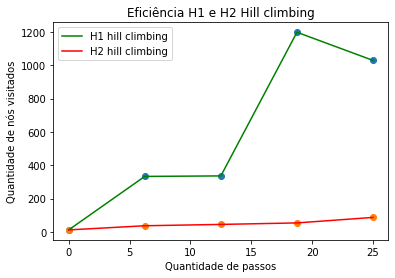

In [ ]:
# EXERCÍCIO 3
# Plotagem do gráfico para analisar a eficiência
# do algoritmo Hill Climbing utilizando tanto
# a heurística de posições erradas, quanto a
# heurística de Manhattan
import numpy as np

hc1 = [12,333,336,1198,1029]
hc2 = [12,37,45,54,87]

x = np.linspace(0, 25, 5)
y1 = hc1
y2 = hc2
plt.title('Eficiência H1 e H2 Hill climbing') 
plt.xlabel('Quantidade de passos')
plt.ylabel('Quantidade de nós visitados')
plt.plot(x, y1, "b-", color = 'green',label='h1')
plt.plot(x, y2, "b-", color = 'red', label ='h2')
plt.legend(['H1 hill climbing', 'H2 hill climbing'], loc=0)
plt.scatter(x, y1)
plt.scatter(x, y2)

In [ ]:
# EXERCÍCIO 4
# Algoritmo A*
# Função busca que utiliza uma função
# heurística como auxílio para calcular
# a solução de maneira mais eficiente e,
# além disso, utiliza uma função g
# para determinar o custo até um nó meta 
# f(n) = h(n) + g(n) 
def busca_a_Star(start,goal,heuristica):
    h = []
    heappush(h,(heuristica(start, goal), start))
    pais = dict()
    visited = [start]

    while (len(h) > 0):
        (_, pai) = heappop(h)
        for filho in sons(pai):
            if filho not in visited:
                visited.append(filho)
                pais[son2str(filho)] = pai
                no = filho
                res = []
                profund = 0
                while no != start:
                    res.append(no)
                    no = pais[son2str(no)]
                    profund += 1
                res.append(start)
                res.reverse()
                if filho == goal:
                    print(len(visited))
                    return res
                else:
                    heappush(h, (heuristica(filho, goal)+ profund, filho))
    print("Nao tem solucao")

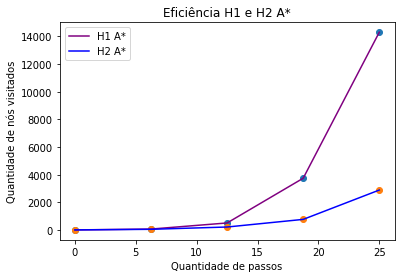

In [ ]:
# Plotagem do gráfico para analisar a eficiência
# do algoritmo A* utilizando tanto
# a heurística de posições erradas, quanto a
# heurística de Manhattan
import numpy as np

h1 = [12,74,515,3748,14300]
h2 = [13,56,222,773,2894]

x = np.linspace(0, 25, 5)
y1 = h1
y2 = h2
plt.title('Eficiência H1 e H2 A*') 
plt.xlabel('Quantidade de passos')
plt.ylabel('Quantidade de nós visitados')
plt.plot(x, y1, "b-", color = 'purple',label='h1')
plt.plot(x, y2, "b-", color = 'blue', label ='h2')
plt.legend(['H1 A*', 'H2 A*'], loc=0)
plt.scatter(x, y1)
plt.scatter(x, y2)

In [ ]:
# EXECUÇÕES TESTE
start = [[1,3,0],[4,5,6],[7,8,2]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]

resp = busca_heuristica(start,goal,h2)
print('')
i = 0
for s in resp:
    print(i)
    i+=1
    printPuzzle(s)
    print()
print('')
print('')

# A* H1
resp2 = busca_a_Star(start,goal,h2)
i = 0
for s in resp2:
    print(i)
    i+=1
    printPuzzle(s)
    print()

37

0
[1, 3, 0]
[4, 5, 6]
[7, 8, 2]

1
[1, 3, 6]
[4, 5, 0]
[7, 8, 2]

2
[1, 3, 6]
[4, 5, 2]
[7, 8, 0]

3
[1, 3, 6]
[4, 5, 2]
[7, 0, 8]

4
[1, 3, 6]
[4, 0, 2]
[7, 5, 8]

5
[1, 3, 6]
[4, 2, 0]
[7, 5, 8]

6
[1, 3, 0]
[4, 2, 6]
[7, 5, 8]

7
[1, 0, 3]
[4, 2, 6]
[7, 5, 8]

8
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

9
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

10
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



56
0
[1, 3, 0]
[4, 5, 6]
[7, 8, 2]

1
[1, 3, 6]
[4, 5, 0]
[7, 8, 2]

2
[1, 3, 6]
[4, 5, 2]
[7, 8, 0]

3
[1, 3, 6]
[4, 5, 2]
[7, 0, 8]

4
[1, 3, 6]
[4, 0, 2]
[7, 5, 8]

5
[1, 3, 6]
[4, 2, 0]
[7, 5, 8]

6
[1, 3, 0]
[4, 2, 6]
[7, 5, 8]

7
[1, 0, 3]
[4, 2, 6]
[7, 5, 8]

8
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

9
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

10
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]

